# Text Data Preprocessing 

#### La partie « linguistique », qui consiste à prétraiter et transformer les informations en entrée en un jeu de données exploitable.

In [199]:
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd
import multiprocess
import multiprocessing

In [286]:
data = pd.read_csv('ficheMetierBanque&Assurances.txt', delimiter = "\t")
print (data)

                          Info générale sur le secteur
0    Le secteur de la banque et de l’assurance est ...
1                Banque, Assurance : qualités requises
2    Un étudiant souhaitant travailler dans le sect...
3                Orientation Métiers Banque, Assurance
4                              Fiche Métier : Actuaire
..                                                 ...
695  Les candidats au poste de broker doivent impér...
696  Situation du métier / contexte pour devenir Tr...
697  Les traders ne sont pas très nombreux, mais il...
698  Secteurs associés au métier : Audit, Conseil, ...
699  Matières associées au métier : Droit, Mathémat...

[700 rows x 1 columns]


# la Tokenisation

In [289]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BCS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BCS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [175]:
# Test tokenisation
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizer.tokenize("hi how are u")

['hi', 'how', 'are', 'u']

In [62]:
#import spacy
#nlp = spacy.load("fr_core_news_sm")
#with open ('ficheMetierBanque&Assurances.txt', encoding='utf-8') as fin:
    # Tokeniser la phrase
#    doc = nlp(fin.read())
#    # Retourner le texte de chaque phrase
#    tokens = [X.text for X in doc.sents]
#    print(tokens)

In [313]:
# Tokenisation du fichier (txt)
tokenizer = nltk.RegexpTokenizer(r'\w+')
with open ('ficheMetierBanque&Assurances.txt', encoding='utf-8') as fin:
    tokens =tokenizer.tokenize(fin.read())
    print(tokens)
    df = pd.DataFrame(tokens)
    df.to_csv('tokens.txt')

['Info', 'générale', 'sur', 'le', 'secteur', 'Le', 'secteur', 'de', 'la', 'banque', 'et', 'de', 'l', 'assurance', 'est', 'un', 'marché', 'qui', 'recrute', 'en', 'permanence', 'De', 'plus', 'au', 'cours', 'de', 'la', 'prochaine', 'décennie', 'ce', 'secteur', 'fera', 'face', 'aux', 'très', 'nombreux', 'départs', 'à', 'la', 'retraite', 'des', 'baby', 'boomers', 'Les', 'entreprises', 'du', 'secteur', 'bancaire', 'et', 'de', 'l', 'assurance', 'prévoient', 'donc', 'le', 'recrutement', 'massif', 'de', 'jeunes', 'diplômés', 'En', 'France', 'il', 'existe', '450', 'banques', 'qui', 'se', 'partagent', '40', '000', 'agences', 'Le', 'marché', 'des', 'assurances', 'est', 'aussi', 'riche', 'avec', '260', 'assureurs', 'Le', 'secteur', 'bancaire', 'compte', 'plus', 'de', '350', '000', 'salariés', 'celui', 'de', 'l', 'assurance', 'près', 'de', '150', '000', 'Depuis', 'plusieurs', 'années', 'maintenant', 'les', 'banques', 'proposent', 'des', 'assurances', 'et', 'les', 'assurances', 'proposent', 'des', 's

In [64]:
#from gensim.utils import tokenize
#with open ('ficheMetierBanque&Assurances.txt', encoding='utf-8') as fin:
#    tokens =" - ".join(tokenize(fin.read(), deacc=True, lower=True))
#    print(tokens)
#df = pd.DataFrame(tokens)
#df.to_csv('tokensGensim.txt')

# La normalisation

### Tous en miniscules

In [314]:
data = [line.strip() for line in tokens]
tokensMinuscule = [text.lower() for text in data]
print(tokensMinuscule)

['info', 'générale', 'sur', 'le', 'secteur', 'le', 'secteur', 'de', 'la', 'banque', 'et', 'de', 'l', 'assurance', 'est', 'un', 'marché', 'qui', 'recrute', 'en', 'permanence', 'de', 'plus', 'au', 'cours', 'de', 'la', 'prochaine', 'décennie', 'ce', 'secteur', 'fera', 'face', 'aux', 'très', 'nombreux', 'départs', 'à', 'la', 'retraite', 'des', 'baby', 'boomers', 'les', 'entreprises', 'du', 'secteur', 'bancaire', 'et', 'de', 'l', 'assurance', 'prévoient', 'donc', 'le', 'recrutement', 'massif', 'de', 'jeunes', 'diplômés', 'en', 'france', 'il', 'existe', '450', 'banques', 'qui', 'se', 'partagent', '40', '000', 'agences', 'le', 'marché', 'des', 'assurances', 'est', 'aussi', 'riche', 'avec', '260', 'assureurs', 'le', 'secteur', 'bancaire', 'compte', 'plus', 'de', '350', '000', 'salariés', 'celui', 'de', 'l', 'assurance', 'près', 'de', '150', '000', 'depuis', 'plusieurs', 'années', 'maintenant', 'les', 'banques', 'proposent', 'des', 'assurances', 'et', 'les', 'assurances', 'proposent', 'des', 's

### Supprimer les ponctuations

In [178]:
# test
s = "string. With',. Punctuation?"
out = re.sub(r'[^\w\s]','',s)
print(out)

string With Punctuation


In [67]:
# supprimer les ponctuations
def supp_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

tokens_without_punct = supp_punctuation(tokensMinuscule)
print(tokens_without_punct )

['info', 'générale', 'sur', 'le', 'secteur', 'le', 'secteur', 'de', 'la', 'banque', 'et', 'de', 'l', 'assurance', 'est', 'un', 'marché', 'qui', 'recrute', 'en', 'permanence', 'de', 'plus', 'au', 'cours', 'de', 'la', 'prochaine', 'décennie', 'ce', 'secteur', 'fera', 'face', 'aux', 'très', 'nombreux', 'départs', 'à', 'la', 'retraite', 'des', 'baby', 'boomers', 'les', 'entreprises', 'du', 'secteur', 'bancaire', 'et', 'de', 'l', 'assurance', 'prévoient', 'donc', 'le', 'recrutement', 'massif', 'de', 'jeunes', 'diplômés', 'en', 'france', 'il', 'existe', '450', 'banques', 'qui', 'se', 'partagent', '40', '000', 'agences', 'le', 'marché', 'des', 'assurances', 'est', 'aussi', 'riche', 'avec', '260', 'assureurs', 'le', 'secteur', 'bancaire', 'compte', 'plus', 'de', '350', '000', 'salariés', 'celui', 'de', 'l', 'assurance', 'près', 'de', '150', '000', 'depuis', 'plusieurs', 'années', 'maintenant', 'les', 'banques', 'proposent', 'des', 'assurances', 'et', 'les', 'assurances', 'proposent', 'des', 's

### supprimer les stops words

In [179]:
french_stopwords = set(stopwords.words('french'))
filtre_stopfr =  lambda text: [token for token in text if token.lower() not in french_stopwords]

In [180]:
#l'ajout de quelques mots vide è la liste des stop words
french_stopwords = nltk.corpus.stopwords.words('french')
newStopWords = ['quelque','quelques','trop','beaucoup','plus','dont','a','moins','faut','comme','leurs','peu','celle','celui','ci','cela','cette','ce','afin','comment','très','entre','aussi','si','tous','tout','toutes','toute','donc','alors','puisque','ici','vers']
french_stopwords.extend(newStopWords)

In [143]:
# Test stop word sur une phrase
data = u"""Wikipédia est un projet wiki d’encyclopédie collective en ligne, universelle, multilingue et fonctionnant sur le principe du wiki. Aimez-vous l'encyclopédie wikipedia ?"""
filtre_stopfr( word_tokenize(data, language="french") )

['Wikipédia',
 'projet',
 'wiki',
 '’',
 'encyclopédie',
 'collective',
 'ligne',
 ',',
 'universelle',
 ',',
 'multilingue',
 'fonctionnant',
 'principe',
 'wiki',
 '.',
 'Aimez-vous',
 "l'encyclopédie",
 'wikipedia',
 '?']

In [181]:
print(french_stopwords)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [182]:
# supprimer les stops words sur notre fichier
tokens_without_sw = [word for word in tokens_without_punct if not word in french_stopwords]

print(tokens_without_sw)

['info', 'générale', 'secteur', 'secteur', 'banque', 'assurance', 'marché', 'recrute', 'permanence', 'cours', 'prochaine', 'décennie', 'secteur', 'fera', 'face', 'nombreux', 'départs', 'retraite', 'baby', 'boomers', 'entreprises', 'secteur', 'bancaire', 'assurance', 'prévoient', 'recrutement', 'massif', 'jeunes', 'diplômés', 'france', 'existe', '450', 'banques', 'partagent', '40', '000', 'agences', 'marché', 'assurances', 'riche', '260', 'assureurs', 'secteur', 'bancaire', 'compte', '350', '000', 'salariés', 'assurance', 'près', '150', '000', 'depuis', 'plusieurs', 'années', 'maintenant', 'banques', 'proposent', 'assurances', 'assurances', 'proposent', 'services', 'produits', 'bancaires', 'richesse', 'services', 'proposés', 'établissement', 'impose', 'avoir', 'connaissances', 'divers', 'domaines', 'banques', 'assurances', 'également', 'dû', 'moderniser', 'répondre', 'exigences', 'nouvelle', 'génération', 'chaque', 'structure', 'possède', 'agences', 'site', 'internet', 'complet', 'espac

### Supprimer les caractères non ASCII  

In [183]:
def supp_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
tokens_without_nascii = supp_non_ascii(tokens_without_sw )
print(tokens_without_nascii)

['info', 'generale', 'secteur', 'secteur', 'banque', 'assurance', 'marche', 'recrute', 'permanence', 'cours', 'prochaine', 'decennie', 'secteur', 'fera', 'face', 'nombreux', 'departs', 'retraite', 'baby', 'boomers', 'entreprises', 'secteur', 'bancaire', 'assurance', 'prevoient', 'recrutement', 'massif', 'jeunes', 'diplomes', 'france', 'existe', '450', 'banques', 'partagent', '40', '000', 'agences', 'marche', 'assurances', 'riche', '260', 'assureurs', 'secteur', 'bancaire', 'compte', '350', '000', 'salaries', 'assurance', 'pres', '150', '000', 'depuis', 'plusieurs', 'annees', 'maintenant', 'banques', 'proposent', 'assurances', 'assurances', 'proposent', 'services', 'produits', 'bancaires', 'richesse', 'services', 'proposes', 'etablissement', 'impose', 'avoir', 'connaissances', 'divers', 'domaines', 'banques', 'assurances', 'egalement', 'du', 'moderniser', 'repondre', 'exigences', 'nouvelle', 'generation', 'chaque', 'structure', 'possede', 'agences', 'site', 'internet', 'complet', 'espac

### Supprimer les nombres et les chiffres

In [184]:
def supp_nb(words):
    new_words = []
    for word in words:
        if word.isdigit():
            words.remove(word)
        else:
            new_words.append(word)
    return new_words

tokens_without_nb = supp_nb(tokens_without_nascii)
print(tokens_without_nb)

['info', 'generale', 'secteur', 'secteur', 'banque', 'assurance', 'marche', 'recrute', 'permanence', 'cours', 'prochaine', 'decennie', 'secteur', 'fera', 'face', 'nombreux', 'departs', 'retraite', 'baby', 'boomers', 'entreprises', 'secteur', 'bancaire', 'assurance', 'prevoient', 'recrutement', 'massif', 'jeunes', 'diplomes', 'france', 'existe', 'partagent', 'agences', 'marche', 'assurances', 'riche', 'secteur', 'bancaire', 'compte', 'salaries', 'assurance', 'pres', 'depuis', 'plusieurs', 'annees', 'maintenant', 'banques', 'proposent', 'assurances', 'assurances', 'proposent', 'services', 'produits', 'bancaires', 'richesse', 'services', 'proposes', 'etablissement', 'impose', 'avoir', 'connaissances', 'divers', 'domaines', 'banques', 'assurances', 'egalement', 'du', 'moderniser', 'repondre', 'exigences', 'nouvelle', 'generation', 'chaque', 'structure', 'possede', 'agences', 'site', 'internet', 'complet', 'espaces', 'clients', 'services', 'ligne', 'applications', 'smartphones', 'tablettes'

### Stemmatisation 
#### Il s'agit de garder que la racine des mots

In [185]:
#test
#LancasterStemmer produit une tige encore plus courte que porter en raison des itérations et une sur-tige se produit.
ps = PorterStemmer()
   
sentence = "programmeur programment avec programmation langauges"
words = word_tokenize(sentence)
   
for w in words:
    print(w, " : ", ps.stem(w))

programmeur  :  programmeur
programment  :  program
avec  :  avec
programmation  :  programm
langauges  :  langaug


In [75]:
def stem_words(words):
    ps = PorterStemmer()
    stems = []
    for word in words:
        stem = ps.stem(word)
        stems.append(stem)
    return stems

tokens_stem = stem_words(tokens_without_nb)
print(tokens_stem)

['info', 'general', 'secteur', 'secteur', 'banqu', 'assur', 'march', 'recrut', 'perman', 'plu', 'cour', 'prochain', 'decenni', 'secteur', 'fera', 'tre', 'nombreux', 'depart', 'retrait', 'babi', 'boomer', 'entrepris', 'secteur', 'bancair', 'assur', 'prevoient', 'donc', 'recrut', 'massif', 'jeun', 'diplom', 'franc', 'exist', 'partag', 'agenc', 'march', 'assur', 'aussi', 'rich', 'secteur', 'bancair', 'compt', 'plu', 'salari', 'celui', 'assur', 'pre', 'depui', 'plusieur', 'anne', 'mainten', 'banqu', 'propos', 'assur', 'assur', 'propos', 'servic', 'produit', 'bancair', 'richess', 'servic', 'propos', 'meme', 'etabliss', 'impos', 'avoir', 'connaiss', 'diver', 'domain', 'banqu', 'assur', 'egal', 'modernis', 'afin', 'repondr', 'exig', 'nouvel', 'gener', 'chaqu', 'structur', 'possed', 'plu', 'agenc', 'site', 'internet', 'complet', 'espac', 'client', 'servic', 'lign', 'applic', 'smartphon', 'tablett', 'secteur', 'banqu', 'assur', 'tout', 'comm', 'march', 'automobil', 'poid', 'lourd', 'point', 'vu

### Lemmatisation
#### singulier et infinitif

In [186]:
#test lemmatize
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))  

Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


In [187]:
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

tokens_lem = lemmatize_verbs(tokens_stem)
print(tokens_lem)

['info', 'general', 'secteur', 'secteur', 'banqu', 'assur', 'march', 'recrut', 'perman', 'plu', 'cour', 'prochain', 'decenni', 'secteur', 'fera', 'tre', 'nombreux', 'depart', 'retrait', 'babi', 'boomer', 'entrepris', 'secteur', 'bancair', 'assur', 'prevoient', 'donc', 'recrut', 'massif', 'jeun', 'diplom', 'franc', 'exist', 'partag', 'agenc', 'march', 'assur', 'aussi', 'rich', 'secteur', 'bancair', 'compt', 'plu', 'salari', 'celui', 'assur', 'pre', 'depui', 'plusieur', 'anne', 'mainten', 'banqu', 'propos', 'assur', 'assur', 'propos', 'servic', 'produit', 'bancair', 'richess', 'servic', 'propos', 'meme', 'etabliss', 'impos', 'avoir', 'connaiss', 'diver', 'domain', 'banqu', 'assur', 'egal', 'modernis', 'afin', 'repondr', 'exig', 'nouvel', 'gener', 'chaqu', 'structur', 'possed', 'plu', 'agenc', 'site', 'internet', 'complet', 'espac', 'client', 'servic', 'lign', 'applic', 'smartphon', 'tablett', 'secteur', 'banqu', 'assur', 'tout', 'comm', 'march', 'automobil', 'poid', 'lourd', 'point', 'vu

In [188]:
df = pd.DataFrame(tokens_stem)
df.to_csv('tokens_stem.csv')

In [155]:
#print(list(zip(*(iter(tokens_stem),)*50)))

[('info', 'general', 'secteur', 'secteur', 'banqu', 'assur', 'march', 'recrut', 'perman', 'plu', 'cour', 'prochain', 'decenni', 'secteur', 'fera', 'tre', 'nombreux', 'depart', 'retrait', 'babi', 'boomer', 'entrepris', 'secteur', 'bancair', 'assur', 'prevoient', 'donc', 'recrut', 'massif', 'jeun', 'diplom', 'franc', 'exist', 'partag', 'agenc', 'march', 'assur', 'aussi', 'rich', 'secteur', 'bancair', 'compt', 'plu', 'salari', 'celui', 'assur', 'pre', 'depui', 'plusieur', 'anne'), ('mainten', 'banqu', 'propos', 'assur', 'assur', 'propos', 'servic', 'produit', 'bancair', 'richess', 'servic', 'propos', 'meme', 'etabliss', 'impos', 'avoir', 'connaiss', 'diver', 'domain', 'banqu', 'assur', 'egal', 'modernis', 'afin', 'repondr', 'exig', 'nouvel', 'gener', 'chaqu', 'structur', 'possed', 'plu', 'agenc', 'site', 'internet', 'complet', 'espac', 'client', 'servic', 'lign', 'applic', 'smartphon', 'tablett', 'secteur', 'banqu', 'assur', 'tout', 'comm', 'march', 'automobil'), ('poid', 'lourd', 'point'

In [ ]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('french'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(tokens):
    words = remove_non_ascii(tokens)
    words = to_lowercase(tokens)
    words = remove_punctuation(tokens)
    words = replace_numbers(tokens)
    words = remove_stopwords(tokens)
    return words

words = normalize(tokens)
print(words)


# word Embedding

#### Word2Vec est un algorithme largement utilisé basé sur les réseaux de neurones, En utilisant de grandes quantités de texte brut non annoté, word2vec apprend automatiquement les relations entre les mots. Les résultats sont des vecteurs, un vecteur par mot, avec des relations linéaires remarquables qui nous permettent de faire des choses comme:

##### vec («roi») - vec («homme») + vec («femme») = ~ vec («reine»)

In [217]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import lee_corpus_list
from gensim.test.utils import datapath
from gensim import utils
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [190]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
    ['this', 'is', 'the', 'second', 'sentence'],
    ['yet', 'another', 'sentence'],
    ['one', 'more', 'sentence'],
    ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
print(model.wv['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, vector_size=100, alpha=0.025)
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
 -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
 -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
 -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
  8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
 -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
  4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
 -4.1370774e-03  8.2453492e-04  8.498

In [191]:
model.wv['and'].shape, model.wv['and'][:10]

((100,),
 array([-0.00872748,  0.00213016, -0.00087354, -0.00931909, -0.00942814,
        -0.00141072,  0.00443241,  0.00370407, -0.00649869, -0.00687307],
       dtype=float32))

In [192]:
try:
    model.wv['rrrrrrrr']
except KeyError as e:
    print(e)

"Key 'rrrrrrrr' not present"


In [193]:
X = model.wv[model.wv.key_to_index]

In [194]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

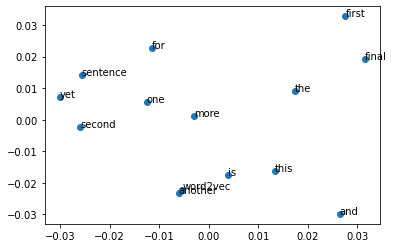

In [195]:
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

#### test: créer notre propre embedding

In [241]:
# Openning all the treated data files

path = 'C:/Users/BCS/Documents/M2/Stage/'

file_name = 'tokens_stem'

file_extension = '.txt'

df = pd.read_csv(path + file_name + file_extension, sep="\t", encoding='utf-8')
df_json = df.reset_index(drop=True)


In [243]:
# créa modèle
cores = multiprocessing.cpu_count()

In [244]:
model_size = 100

In [245]:
model = gensim.models.Word2Vec(df_json, size = model_size, window = 5, min_count = 2, 
                               workers = cores-1, sg = 0, max_final_vocab = 5000, iter=10)

TypeError: __init__() got an unexpected keyword argument 'size'

In [ ]:
name entity reconnation